## 파키스탄 주택 가격 분석

In [133]:
import pandas as pd

# Load the data
file_path = r'C:\Users\user\Desktop\응계경 과제\data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,7322700.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,17754000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,5940000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,19932000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,16830000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [134]:
data = data[data['waterfront'] == 0]


In [135]:
data = data.drop(['id', 'date', 'waterfront'], axis=1)

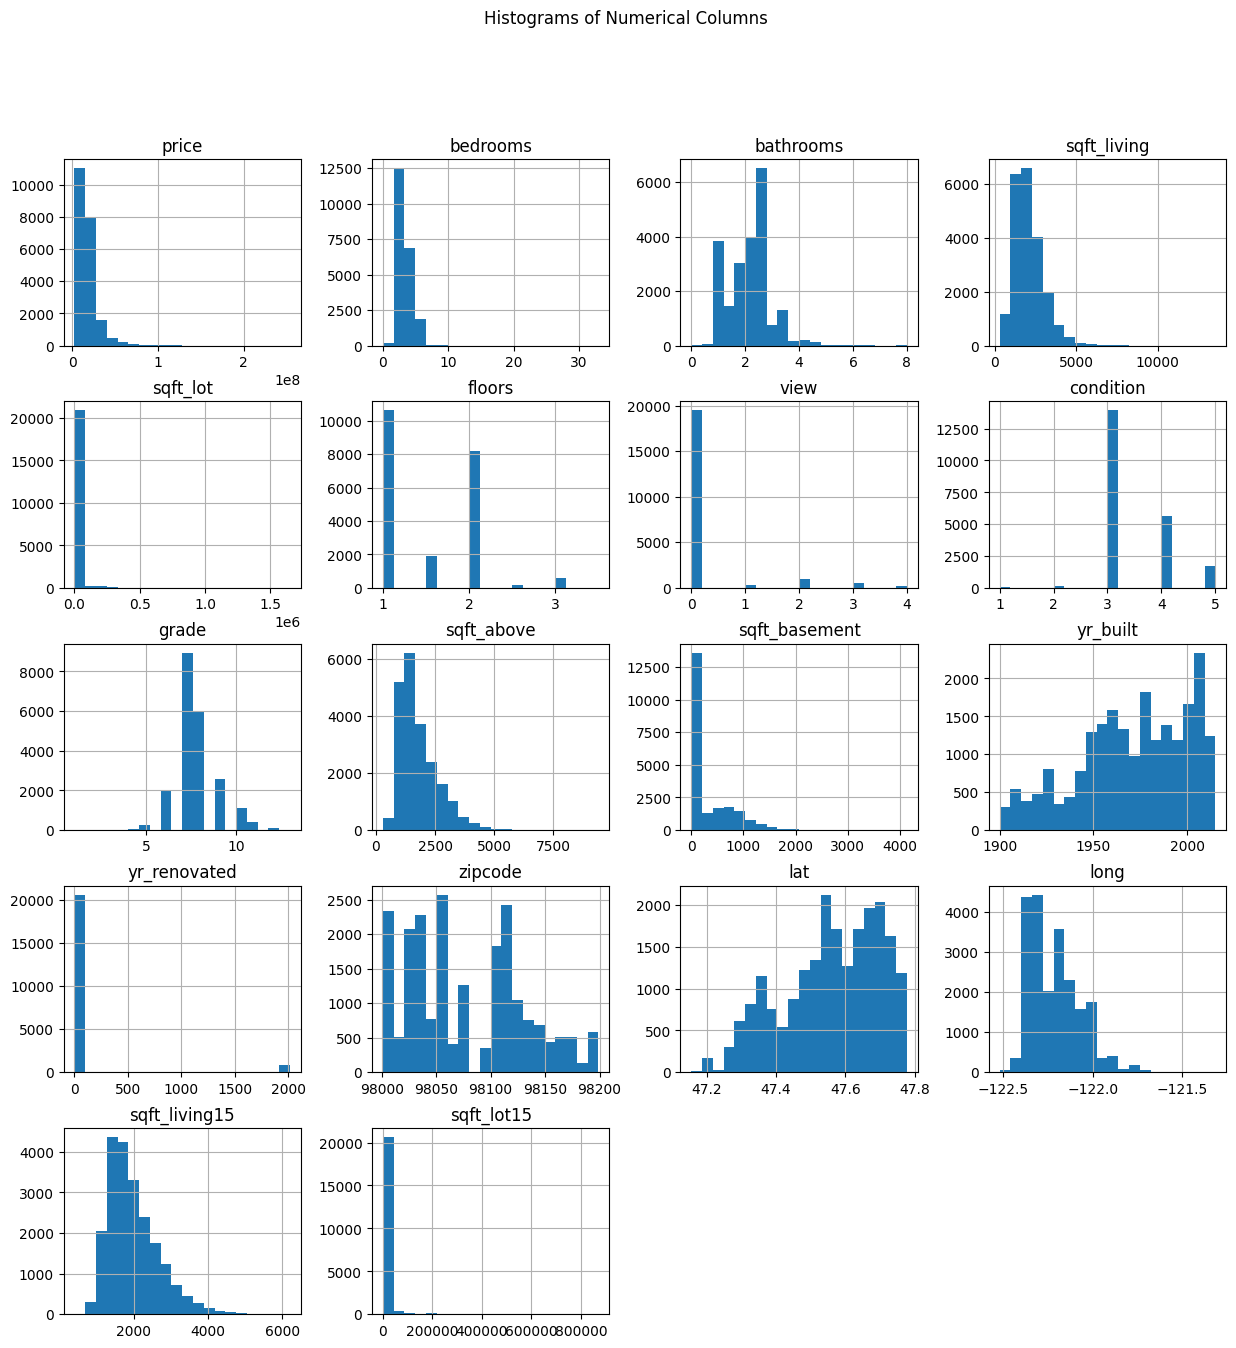

<Figure size 1500x2000 with 0 Axes>

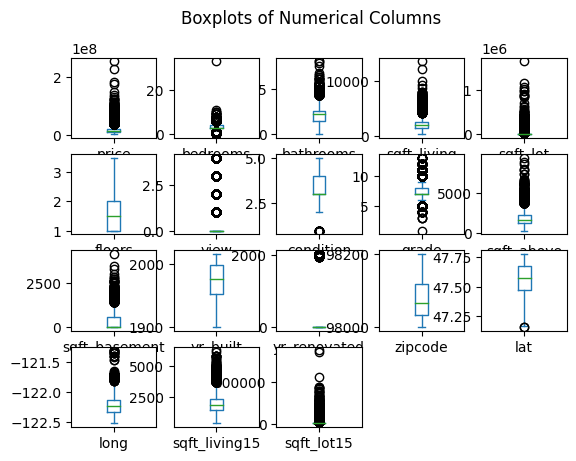

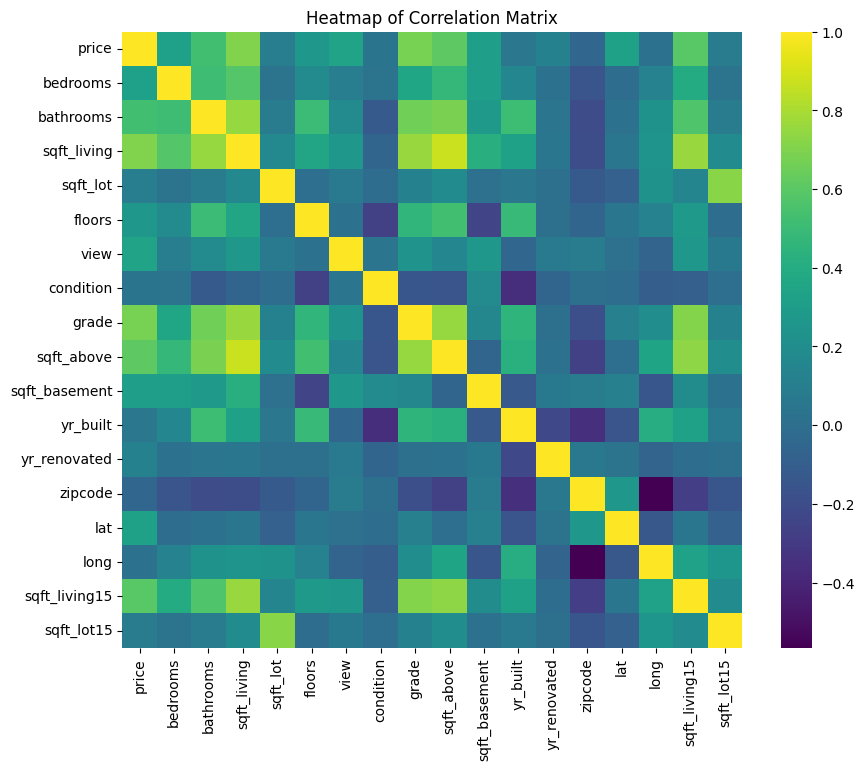

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting histogram for each numerical column
data.hist(figsize=(15, 15), bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Plotting boxplot for each numerical column
plt.figure(figsize=(15, 20))
data.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numerical Columns")
plt.show()

# Plotting heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [137]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

scaled_data_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.906532,-0.399829,-1.450411,-0.983836,-0.226550,-0.913783,-0.295245,-0.628500,-0.556161,-0.733795,-0.659345,-0.547149,-0.205846,1.875353,-0.353439,-0.309737,-0.940927,-0.257848
1,0.018842,-0.399829,0.182232,0.549980,-0.188095,0.939005,-0.295245,-0.628500,-0.556161,0.470567,0.255142,-0.683323,4.844557,0.883414,1.159087,-0.750005,-0.427470,-0.185054
2,-1.029193,-1.476448,-1.450411,-1.436257,-0.121475,-0.913783,-0.295245,-0.628500,-1.413916,-1.232571,-0.659345,-1.296103,-0.205846,-0.932021,1.280926,-0.139310,1.083560,-0.169573
3,0.212056,0.676789,1.161817,-0.123133,-0.242251,-0.913783,-0.295245,2.448724,-0.556161,-0.891943,1.421113,-0.206715,-0.205846,1.089288,-0.284229,-1.275487,-0.911587,-0.281637
4,-0.063127,-0.399829,-0.144297,-0.432104,-0.167853,-0.913783,-0.295245,-0.628500,0.301594,-0.125531,-0.659345,0.542239,-0.205846,-0.071093,0.407871,1.195698,-0.266098,-0.190032


In [138]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Assuming the model has already been fitted using GLS or another regression method
# and the data 'X' and 'y' are defined and prepared

# Fit the model (if not already fitted)
X = scaled_data_df[['bathrooms', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sqft_above','bedrooms']]
y = scaled_data_df['price']

X = sm.add_constant(X)

# VIF 검정으로 날린 변수 'sqft_basement', sqft_living

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying the VIF values
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
14,sqft_above,4.042020
6,grade,3.276277
12,sqft_living15,2.864945
1,bathrooms,2.758665
7,yr_built,2.403312
13,sqft_lot15,2.152554
2,sqft_lot,2.120454
3,floors,1.829843
11,long,1.820720
9,zipcode,1.663200


In [140]:
model = sm.OLS(y, X).fit()

# Perform White's test for heteroskedasticity
test_statistic, p_value, f_value, f_p_value = het_white(model.resid, model.model.exog)

test_statistic, p_value, f_value, f_p_value

(8997.310013106462, 0.0, 114.07243219838458, 0.0)

In [141]:
# Performing the multiple linear regression
model = sm.GLS(y, X).fit()

# Getting the summary of the model
model_summary = model.summary()
print(model_summary)

                            GLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            GLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2935.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:29:08   Log-Likelihood:                -18462.
No. Observations:               21450   AIC:                         3.696e+04
Df Residuals:                   21434   BIC:                         3.708e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.78e-15      0.004   1.22e-12